In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
model = keras.models.load_model('./model')

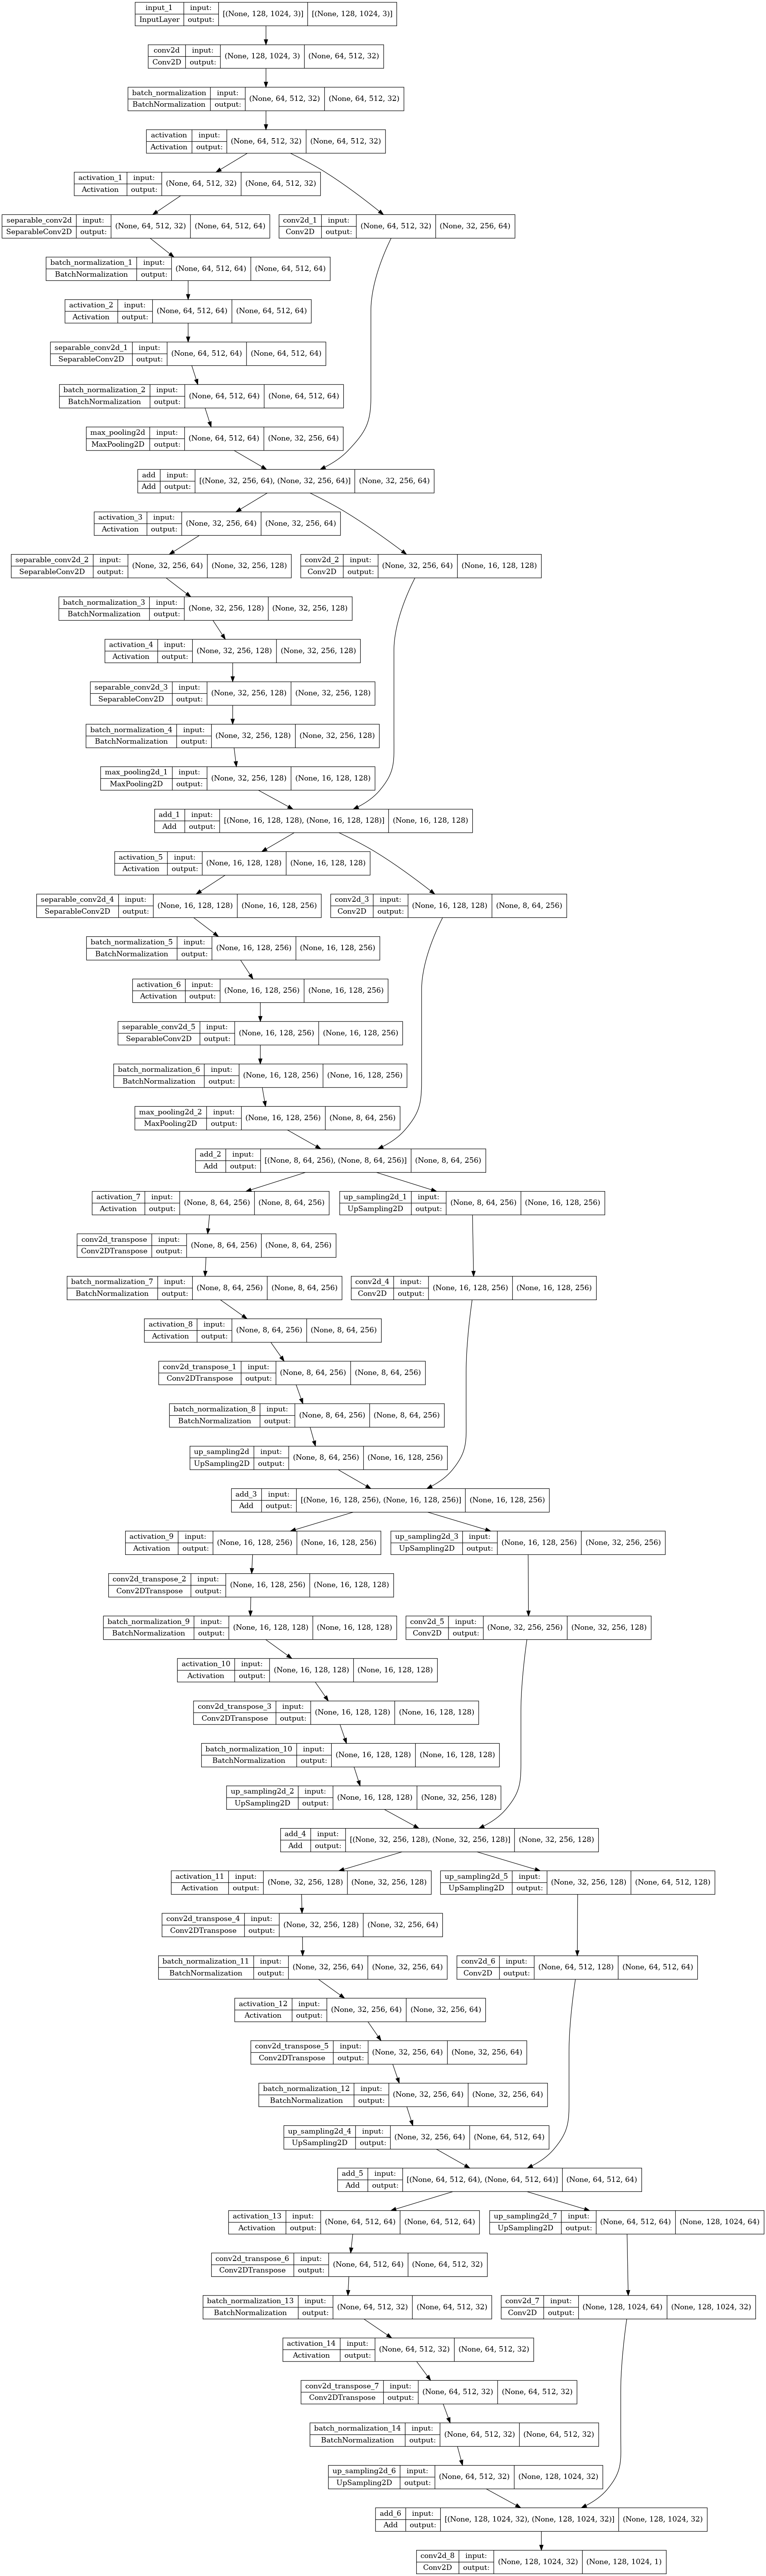

In [3]:
keras.utils.plot_model(model, show_shapes=True)

In [4]:
test_image_path = '../data/210416D.003_1400701D.E003_9905_1.jpg'

In [5]:
IMAGE_HEIGHT = 128
IMAGE_WIDTH = 1024

def read_data(file_path, mask=False, height=IMAGE_HEIGHT, width=IMAGE_WIDTH):
    
    data = tf.io.read_file(file_path)
    
    if mask:
        
        data = tf.io.decode_raw(data, tf.int8)
        data = tf.reshape(data, [200, 2048,1])
        data = tf.image.resize(images=data, size=[height, width])
        
    else:
        
        data = tf.image.decode_png(data, channels=3)
        data.set_shape([None, None, 3])
        data = tf.image.resize(images=data, size=[height, width])
        data = data / 255.
        
    return data

def load_data(image_list):
    image = read_data(image_list)
    
    return image

In [52]:
%%timeit -n1 -r1
test_img = read_data(test_image_path)
test_img = tf.reshape(test_img, [1, 128, 1024, 3])


2.65 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [49]:
%%timeit -n1 -r1

pred_mask = model.predict(test_img)

104 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


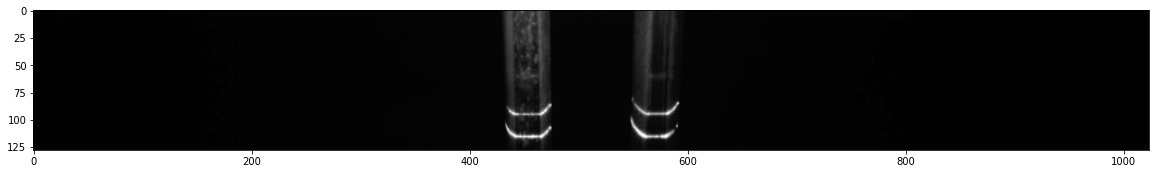

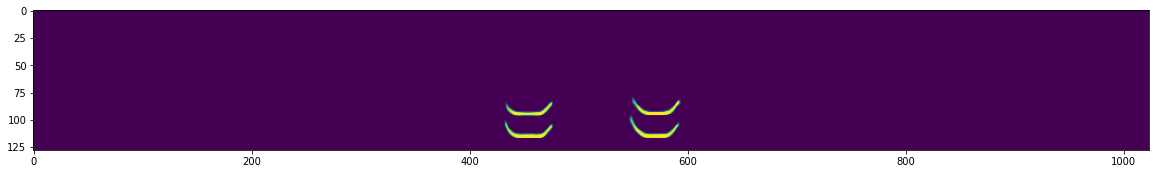

In [8]:
plt.figure(figsize=(20, 10))
plt.imshow(test_img[0])
plt.figure(figsize=(20, 10))
plt.imshow(pred_mask[0])